# Test Keras Model 'Class1' on SDNet and Skyebase data 

##  Quick'n Dirty Keras model from Tuesday on 2k images per SDNet folder and the positive extras from Skyebase 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
#from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.layers.experimental.preprocessing import Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.models import Sequential, Model, load_model #, Input
#from tensorflow.keras.layers import Dense, Dropout, Flatten
#from tensorflow.keras.layers import Conv2D, MaxPooling2D
#from tensorflow.keras.layers import BatchNormalization
#from tensorflow.keras.layers import LeakyReLU
#from tensorflow.keras.layers import experimental.preprocessing.Rescaling

#from sklearn.model_selection import train_test_split
#from sklearn.metrics import classification_report

import os
import re

model = load_model("model_class1.h5")
# train folder(Kaggle Concrete surface crack Data): first 'negative', second 'positive' => 
# score will be positive crack, 1-score = score for not crack

## Testing on SDNet

### SDNet/D/CD: 2k images 'cracked'

In [24]:
# Check 2000 files in the SDNet D/CD folder
path = os.path.abspath('/home/becode/AI/Data/Skyebase/SDNet/D/CD')
folder_path = path
count = 0
image_size = (150,150)
file = []
no_crack = []
crack = []
for path, dirs, files in os.walk(folder_path):
    files.sort()
    for filename in files:
        if count < 2000:
            src_file = os.path.join(path, filename)
            img = keras.preprocessing.image.load_img( src_file, target_size=image_size)
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis

            predictions = model.predict(img_array)
            score = predictions[0]
            score = score.item()
            #print(
            #    f"{filename} is {round(100 * (1 - score),3)} percent uncracked and {round(100 * score,3)} percent cracked."
            #)
            
            # fill lists for scores in DataFrame
            file.append(filename)
            no_crack.append(round(100*(1-score),3))
            crack.append(round(100*score,3))
            count += 1
            
# Dataframe with results per file in folder
results = pd.DataFrame({'filename' : file , 'score no cracks' : no_crack, 'crack score': crack})
results = results.to_csv('D-CD.csv')

In [25]:
mean_nocrack = round(sum(no_crack) / len(no_crack),1)
mean_crack = round(sum(crack) / len(crack),1)
sum_acc = {}
sum_acc['SDNet/D/CD'] = mean_crack
print(f"Wrong: {mean_nocrack} %, right: {mean_crack} %")

Wrong: 80.7 %, right: 19.3 %


### SDNet/D/UD: 2k images 'uncracked'

In [26]:
# Check 2000 files in the SDNet D/UD folder
path = os.path.abspath('/home/becode/AI/Data/Skyebase/SDNet/D/UD')
folder_path = path
count = 0
image_size = (150,150)
for path, dirs, files in os.walk(folder_path):
    files.sort()
    for filename in files:
        if count < 2000:
            src_file = os.path.join(path, filename)
            img = keras.preprocessing.image.load_img( src_file, target_size=image_size)
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis

            predictions = model.predict(img_array)
            score = predictions[0]
            score = score.item()
            #print(
            #    f"{filename} is {round(100 * (1 - score),3)} percent uncracked and {round(100 * score,3)} percent cracked."
            #)
            # fill lists for scores in DataFrame
            file.append(filename)
            no_crack.append(round(100*(1-score),3))
            crack.append(round(100*score,3))
            count += 1
# Dataframe with results per file in folder
results = pd.DataFrame({'filename' : file , 'score no cracks' : no_crack, 'crack score': crack})
results = results.to_csv('D-UD.csv')

In [27]:
mean_nocrack = round(sum(no_crack) / len(no_crack),1)
mean_crack = round(sum(crack) / len(crack),1)
sum_acc['SDNet/D/UD'] = mean_nocrack
print(f"Wrong: {mean_crack} %, right: {mean_nocrack} %")

Wrong: 12.3 %, right: 87.7 %


### SDNet/P/CP: 2k images 'cracked'

In [28]:
# Check 2000 files in the SDNet D/UD folder
path = os.path.abspath('/home/becode/AI/Data/Skyebase/SDNet/P/CP')
folder_path = path
count = 0
image_size = (150,150)

for path, dirs, files in os.walk(folder_path):
    files.sort()
    for filename in files:
        if count < 2000:
            src_file = os.path.join(path, filename)
            img = keras.preprocessing.image.load_img( src_file, target_size=image_size)
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis

            predictions = model.predict(img_array)
            score = predictions[0]
            score = score.item()
            #print(
            #    f"{filename} is {round(100 * (1 - score),3)} percent uncracked and {round(100 * score,3)} percent cracked."
            #)
            
            # fill lists for scores in DataFrame
            file.append(filename)
            no_crack.append(round(100*(1-score),3))
            crack.append(round(100*score,3))
            count += 1
# Dataframe with results per file in folder
results = pd.DataFrame({'filename' : file , 'score no cracks' : no_crack, 'crack score': crack})
results = results.to_csv('P-CP.csv')

In [29]:
mean_nocrack = round(sum(no_crack) / len(no_crack),1)
mean_crack = round(sum(crack) / len(crack),1)
sum_acc['SDNet/P/CP'] = mean_crack
print(f"Wrong: {mean_nocrack} %, right: {mean_crack} %")

Wrong: 64.8 %, right: 35.2 %


### SDNet/P/UP: 2k images 'uncracked'

In [30]:
# Check 2000 files in the SDNet C/UP folder
path = os.path.abspath('/home/becode/AI/Data/Skyebase/SDNet/P/UP')
folder_path = path
count = 0
image_size = (150,150)
for path, dirs, files in os.walk(folder_path):
    files.sort()
    for filename in files:
        if count < 2000:
            src_file = os.path.join(path, filename)
            img = keras.preprocessing.image.load_img( src_file, target_size=image_size)
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis

            predictions = model.predict(img_array)
            score = predictions[0]
            score = score.item()
            #print(
            #    f"{filename} is {round(100 * (1 - score),3)} percent uncracked and {round(100 * score,3)} percent cracked."
            #)
            
            # fill lists for scores in DataFrame
            file.append(filename)
            no_crack.append(round(100*(1-score),3))
            crack.append(round(100*score,3))
            count += 1
# Dataframe with results per file in folder
results = pd.DataFrame({'filename' : file , 'score no cracks' : no_crack, 'crack score': crack})
results = results.to_csv('P-UP.csv')

In [31]:
mean_nocrack = round(sum(no_crack) / len(no_crack),1)
mean_crack = round(sum(crack) / len(crack),1)
sum_acc['SDNet/P/UP'] = mean_nocrack
print(f"Wrong: {mean_crack} %, right: {mean_nocrack} %")

Wrong: 40.1 %, right: 59.9 %


### SDNet/W/CW: 2k images 'cracked'

In [32]:
# Check 2000 files in the SDNet C/UP folder
path = os.path.abspath('/home/becode/AI/Data/Skyebase/SDNet/W/CW')
folder_path = path
count = 0
image_size = (150,150)
for path, dirs, files in os.walk(folder_path):
    files.sort()
    for filename in files:
        if count < 2000:
            src_file = os.path.join(path, filename)
            img = keras.preprocessing.image.load_img( src_file, target_size=image_size)
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis

            predictions = model.predict(img_array)
            score = predictions[0]
            score = score.item()
            #print(
            #    f"{filename} is {round(100 * (1 - score),3)} percent uncracked and {round(100 * score,3)} percent cracked."
            #)
            
            # fill lists for scores in DataFrame
            file.append(filename)
            no_crack.append(round(100*(1-score),3))
            crack.append(round(100*score,3))
            count += 1
# Dataframe with results per file in folder
results = pd.DataFrame({'filename' : file , 'score no cracks' : no_crack, 'crack score': crack})
results = results.to_csv('W-CW.csv')

In [33]:
mean_nocrack = round(sum(no_crack) / len(no_crack),1)
mean_crack = round(sum(crack) / len(crack),1)
sum_acc['SDNet/W/CW'] = mean_crack
print(f"Wrong: {mean_nocrack} %, right: {mean_crack} %")

Wrong: 65.2 %, right: 34.8 %


### SDNet/W/UW: 2k images 'uncracked'

In [34]:
# Check 2000 files in the SDNet C/UP folder
path = os.path.abspath('/home/becode/AI/Data/Skyebase/SDNet/W/UW')
folder_path = path
count = 0
image_size = (150,150)
for path, dirs, files in os.walk(folder_path):
    files.sort()
    for filename in files:
        if count < 2000:
            src_file = os.path.join(path, filename)
            img = keras.preprocessing.image.load_img( src_file, target_size=image_size)
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis

            predictions = model.predict(img_array)
            score = predictions[0]
            score = score.item()
            #print(
            #    f"{filename} is {round(100 * (1 - score),3)} percent uncracked and {round(100 * score,3)} percent cracked."
            #)
            
            # fill lists for scores in DataFrame
            file.append(filename)
            no_crack.append(round(100*(1-score),3))
            crack.append(round(100*score,3))
            count += 1
# Dataframe with results per file in folder
results = pd.DataFrame({'filename' : file , 'score no cracks' : no_crack, 'crack score': crack})
results = results.to_csv('W-UW.csv')

In [35]:
mean_nocrack = round(sum(no_crack) / len(no_crack),1)
mean_crack = round(sum(crack) / len(crack),1)
sum_acc['SDNet/W/UW'] = mean_nocrack
print(f"Wrong: {mean_crack} %, right: {mean_nocrack} %")

Wrong: 30.4 %, right: 69.6 %


## Testing on Skyebase 'positive' Data

#### Skyebase is so high res and so different in size from training data that necessary rescaling/resizing can be problematic for accuracy

### Skyebase/Positive/TB:  145 images 'cracked' or 'positive'

In [36]:
# Check all files in the Skyebase NDA/Positive/TB folder
path = os.path.abspath('/home/becode/AI/Data/Skyebase/Skyebase NDA/Positive/TB')
folder_path = path
image_size = (150,150)
for path, dirs, files in os.walk(folder_path):
    files.sort()
    for filename in files:
        if re.match('(.)+.jpg', filename):
            src_file = os.path.join(path, filename)
            img = keras.preprocessing.image.load_img( src_file, target_size=image_size)
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis

            predictions = model.predict(img_array)
            score = predictions[0]
            score = score.item()
            #print(
            #    f"{filename} is {round(100 * (1 - score),3)} percent uncracked and {round(100 * score,3)} percent cracked."
            #)
            
            # fill lists for scores in DataFrame
            file.append(filename)
            no_crack.append(round(100*(1-score),3))
            crack.append(round(100*score,3))
            count += 1
# Dataframe with results per file in folder
results = pd.DataFrame({'filename' : file , 'score no cracks' : no_crack, 'crack score': crack})
results = results.to_csv('Skye-Pos-TB.csv')

In [37]:
mean_nocrack = round(sum(no_crack) / len(no_crack),1)
mean_crack = round(sum(crack) / len(crack),1)
sum_acc['Positive/TB'] = mean_crack
print(f"Wrong: {mean_nocrack} %, right: {mean_crack} %")

Wrong: 69.3 %, right: 30.7 %


### Skyebase/Positive/NS:  685 images 'cracked' or 'positive'

In [38]:
# Check all files in the Skyebase NDA/Positive/NS folder
path = os.path.abspath('/home/becode/AI/Data/Skyebase/Skyebase NDA/Positive/NS')
folder_path = path
image_size = (150,150)
for path, dirs, files in os.walk(folder_path):
    files.sort()
    for filename in files:
        if re.match('(.)+.jpg', filename):
            src_file = os.path.join(path, filename)
            img = keras.preprocessing.image.load_img( src_file, target_size=image_size)
            img_array = keras.preprocessing.image.img_to_array(img)
            img_array = tf.expand_dims(img_array, 0)  # Create batch axis

            predictions = model.predict(img_array)
            score = predictions[0]
            score = score.item()
            #print(
            #    f"{filename} is {round(100 * (1 - score),3)} percent uncracked and {round(100 * score,3)} percent cracked."
            #)
            
            # fill lists for scores in DataFrame
            file.append(filename)
            no_crack.append(round(100*(1-score),3))
            crack.append(round(100*score,3))
            count += 1
# Dataframe with results per file in folder
results = pd.DataFrame({'filename' : file , 'score no cracks' : no_crack, 'crack score': crack})
results = results.to_csv('Skye-Pos-NS.csv')

In [39]:
mean_nocrack = round(sum(no_crack) / len(no_crack),1)
mean_crack = round(sum(crack) / len(crack),1)
sum_acc['Positive/NS'] = mean_crack
print(f"Wrong: {mean_nocrack} %, right: {mean_crack} %")

Wrong: 66.3 %, right: 33.7 %


### Summary

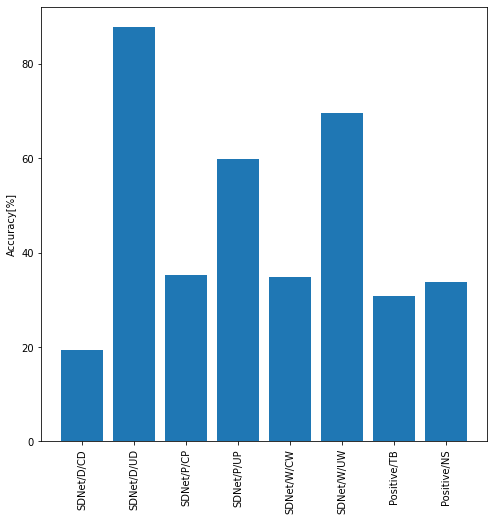

In [52]:
x=np.arange(8)
plt.figure(figsize=(8,8))
plt.bar(x, height = sum_acc.values())
plt.xticks(x,sum_acc.keys(), rotation='vertical')
plt.ylabel('Accuracy[%]')
plt.show()